#**SALES PREDICTION USING PYTHON**

---



---



##Importing Dependencies

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##Loading the dataset
Let’s load the dataset with the read_csv method to open the advertising.csv file from the datasets folder and display the top five records with the head method

In [3]:
df=pd.read_csv("/content/Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


##Dropping the unrequired column

In [5]:
df.drop(['Unnamed: 0'],axis=1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


##Let’s check if there is a null value

In [6]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

#Statistical Analysis of Data


---





##Describing the data

In [23]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


##Drawing correlation between columns
Correlation analysis is an important part when we want to build a model. We must understand how the independent variable has a correlation with the dependent variable. For this, we can create a heatmap that can explain the correlation between the columns in the dataset.




<Axes: >

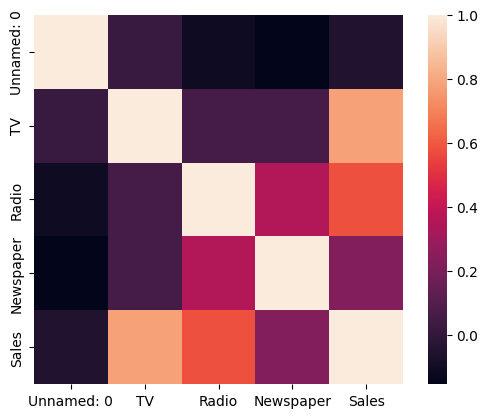

In [7]:
sns.heatmap(df.corr(), square=True)

Since we want to build a linear regression model, we need to find some independent variables that have a significant correlation with the Sales variable (as the target variable).

Here, TV has a positive correlation with Sales. So, we will take TV as a feature (X) and Sales as a predictor (y) for the regression model we are going to create. We will use seaborn’s lmplot method to see the correlation between TV and Sales:

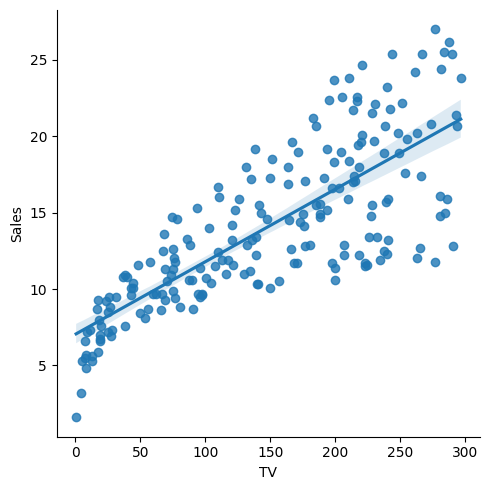

In [8]:
sns.lmplot(x='TV', y='Sales', data=df)

##Creating the features and target variables in an array

In [9]:
X = df[['TV']]
y = df.Sales

##Creating and Training models

X is the independent variable and Y is the target variable (output). In train_test_split, test_size indicates the size of the dataset for testing. The value of 0.3 means that the data is divided into 70% for training and 30% for testing.

random_state to randomize the training and test data.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

##Training the linear regression model

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##Prediction

In [12]:
print(model.coef_)
print(model.intercept_)

[0.04474675]
7.308260742166187


In [13]:
model.predict([[40]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.09813086])

In [14]:
y_pred = model.predict(X_test)


##Comparison of the actual data with the predicted data

In [15]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predict': y_pred.flatten()
})

act_predict.head(5)

,Actual,Predict
0,18.4,16.736402
1,7.2,7.697557
2,18.0,17.080952
3,25.5,19.998440
4,22.6,16.991458


<Axes: >

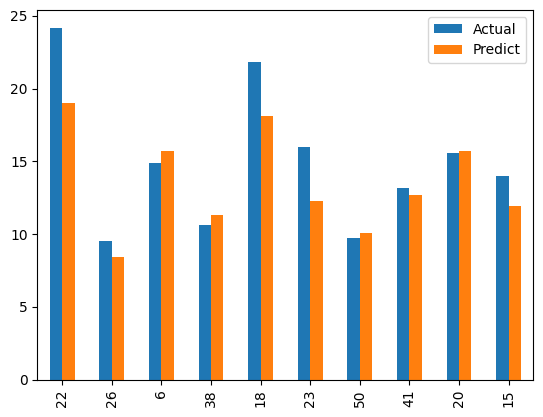

In [16]:
act_predict.sample(10).plot(kind='bar')

##Model Evaluation

In [17]:
model.score(X_test, y_test)

0.6447879078216139

##Multiple Linear Regression

In [18]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df.Sales

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.3, random_state = 10)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
model.score(X_test, y_test)

0.8567790678044409

##Sample Prediction

In [22]:
my_tv=44.5
my_radio=39.3
my_newspaper=45.1

sales_pred=model.predict([[my_tv,my_radio,my_newspaper]])

print(sales_pred)

[12.75655772]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
